In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import proplot as pplot
import cmaps
from matplotlib.patches import Rectangle
import matplotlib as mpl
from cartopy.util import add_cyclic_point
from scipy.stats import pearsonr
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
target_griddes = {'lat': np.arange(0, 91, 3),'lon':np.arange(0, 359, 3)}
dataset_dir = {
    'CanESM5':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/CanESM5/',
    'HadGEM3-GC31-LL':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/HadGEM3-GC31-LL/',
    'IPSL-CM6A-LR':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/IPSL-CM6A-LR/',
    'MIROC6':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/MIROC6/',
    'MRI-ESM2-0':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/MRI-ESM2-0/',
    'era5':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/era5_data/',
    'jra55':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/jra55_data/',
    'ncep2':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/ncep_data/'
}
dataset_src_run = {
    'CanESM5':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
    },
    'HadGEM3-GC31-LL':{
        'historical':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-GHG':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-nat':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-aer':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'ssp585':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
    },
    'MIROC6':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
    },
    'IPSL-CM6A-LR':{
        'historical':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r6i1p1f1','r14i1p1f1'],
    },
    'MRI-ESM2-0':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
    },
}


In [ ]:
def sel_domain(dataarray,lon_min,lon_max,lat_min,lat_max):
    mask_lon = (dataarray.lon >= lon_min) & (dataarray.lon <= lon_max)
    mask_lat = (dataarray.lat >= lat_min) & (dataarray.lat <= lat_max)
    dataarray = dataarray.where(mask_lon & mask_lat, drop=True)
    return dataarray

In [ ]:
def get_file_path(var_name, dataset, forcing = None, ensmeble = None, trendOrSig = 'trend'):
    if var_name == 'zg' or var_name == 'hgt':
        if dataset not in ['era5','ncep2','jra55']:
            if dataset != 'HadGEM3-GC31-LL':
                path = dataset_dir[dataset] + var_name + '_day_' + dataset + '_' + forcing + '_' + ensmeble + '_gn_1979-01-01-2014-12-31_level50000_' + trendOrSig + '.nc'
            else:
                path = dataset_dir[dataset] + var_name + '_day_' + dataset + '_' + forcing + '_' + ensmeble + '_gn_1979-01-01-2014-12-30_level50000_' + trendOrSig + '.nc'
        else:
            path = dataset_dir[dataset] + var_name + '_' + dataset + '_1979-2014_' + trendOrSig + '.nc'
    elif var_name == 'tasmax' or var_name == 'mx2t' or var_name == 'maxTx':
        if dataset not in ['era5','ncep2','jra55']:
            if dataset != 'HadGEM3-GC31-LL':
                path = dataset_dir[dataset] + var_name + '_day_' + dataset + '_' + forcing + '_' + ensmeble + '_gn_1979-01-01-2014-12-31_'  + trendOrSig + '.nc'
            else:
                path = dataset_dir[dataset] + var_name + '_day_' + dataset + '_' + forcing + '_' + ensmeble + '_gn_1979-01-01-2014-12-30_'  + trendOrSig + '.nc'
        else:
            path = dataset_dir[dataset] + var_name + '_' + dataset + '_1979-2014_' + trendOrSig + '.nc'
    return path

In [ ]:
def get_reanalysis_avg(var_name,trendOrSig = 'trend'):
    var_path_era5 = get_file_path(var_name = var_name, dataset = 'era5',trendOrSig = trendOrSig)
    var_path_ncep2 = get_file_path(var_name = var_name, dataset = 'ncep2',trendOrSig = trendOrSig)
    var_path_jra55 = get_file_path(var_name = var_name, dataset = 'jra55',trendOrSig = trendOrSig)
    var_era5 = xr.open_dataarray(var_path_era5)
    var_ncep2 = xr.open_dataarray(var_path_ncep2)
    var_jra55 = xr.open_dataarray(var_path_jra55)
    var_era5 = var_era5.rename({'longitude':'lon','latitude':'lat'})
    var_era5 = var_era5.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_ncep2 = var_ncep2.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_jra55 = var_jra55.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_era5 = var_era5.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_ncep2 = var_ncep2.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_jra55 = var_jra55.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_avg = (var_era5 + var_ncep2 + var_jra55) / 3
    return var_avg

In [ ]:
def get_reanalysis_sig(var_name): 
    '''
    decide the significance of the trends in reanalyses average, 
    only those grids with significant trends (p<0.05) in more than two of the three reanalyses are marked as significant
    '''
    var_path_era5 = get_file_path(var_name = var_name, dataset = 'era5',trendOrSig = 'sig')
    var_path_ncep2 = get_file_path(var_name = var_name, dataset = 'ncep2',trendOrSig = 'sig')
    var_path_jra55 = get_file_path(var_name = var_name, dataset = 'jra55',trendOrSig = 'sig')
    var_era5 = xr.open_dataarray(var_path_era5)
    var_ncep2 = xr.open_dataarray(var_path_ncep2)
    var_jra55 = xr.open_dataarray(var_path_jra55)
    var_era5 = var_era5.rename({'longitude':'lon','latitude':'lat'})
    var_era5 = var_era5.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_ncep2 = var_ncep2.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_jra55 = var_jra55.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_era5 = var_era5.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_ncep2 = var_ncep2.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_jra55 = var_jra55.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')

    var_era5 = var_era5 < 0.05
    var_ncep2 = var_ncep2 < 0.05
    var_jra55 = var_jra55 < 0.05
    sig = (var_era5 * 1 + var_ncep2  * 1+ var_jra55 * 1) >= 2
    return sig

In [ ]:
def get_cmip_avg(var_name,forcing,trendOrSig = 'trend'):
    var_da_ens = xr.DataArray(0)
    count = 0
    for d in dataset_src_run.keys():
        for e in dataset_src_run[d][forcing]:
            var_path = get_file_path(var_name=var_name, dataset=d, forcing=forcing, ensmeble=e, trendOrSig=trendOrSig)
            if var_name != 'tasmax':
                var_da = xr.open_dataarray(var_path)
            else:
                var_da = xr.open_dataset(var_path)
                var_da = var_da['tasmax']
                var_da = sel_domain(var_da,lon_min=0,lon_max=360,lat_min=0,lat_max=90)
            var_da = var_da.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
            var_da = var_da.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
            var_da = var_da.interpolate_na(dim='lat',method='linear',fill_value='extrapolate')
            var_da_ens = var_da_ens + var_da
            count += 1
    var_da_ens = var_da_ens / count
    return var_da_ens

In [ ]:
def get_cmip_sig(var_name,forcing,trendOrSig = 'trend'):
    var_da_ens_mean = get_cmip_avg(var_name=var_name,forcing=forcing,trendOrSig=trendOrSig)
    var_da_ens_sig_pos = xr.DataArray(0)
    var_da_ens_sig_neg = xr.DataArray(0)
    count = 0
    for d in dataset_src_run.keys():
        for e in dataset_src_run[d][forcing]:
            var_path = get_file_path(var_name=var_name, dataset=d, forcing=forcing, ensmeble=e, trendOrSig=trendOrSig)
            if var_name != 'tasmax':
                var_da = xr.open_dataarray(var_path)
            else:
                var_da = xr.open_dataset(var_path)
                var_da = var_da['tasmax']
                var_da = sel_domain(var_da,lon_min=0,lon_max=360,lat_min=0,lat_max=90)
            var_da = var_da.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
            var_da = var_da.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
            var_da = var_da.interpolate_na(dim='lat',method='linear',fill_value='extrapolate')
            var_da_sig_pos = (var_da > 0) * (var_da_ens_mean > 0)
            var_da_sig_neg = (var_da < 0) * (var_da_ens_mean < 0)
            var_da_ens_sig_pos = var_da_ens_sig_pos + var_da_sig_pos * 1
            var_da_ens_sig_neg = var_da_ens_sig_neg + var_da_sig_neg * 1
            count += 1
    var_da_ens_sig_pos = var_da_ens_sig_pos > count * 0.8
    var_da_ens_sig_neg = var_da_ens_sig_neg > count * 0.8
    var_da_ens_sig = var_da_ens_sig_pos * 1 + var_da_ens_sig_neg * 1
    return var_da_ens_sig

## FigureS2 Trends of JJA GPH and Tmax for different forcings

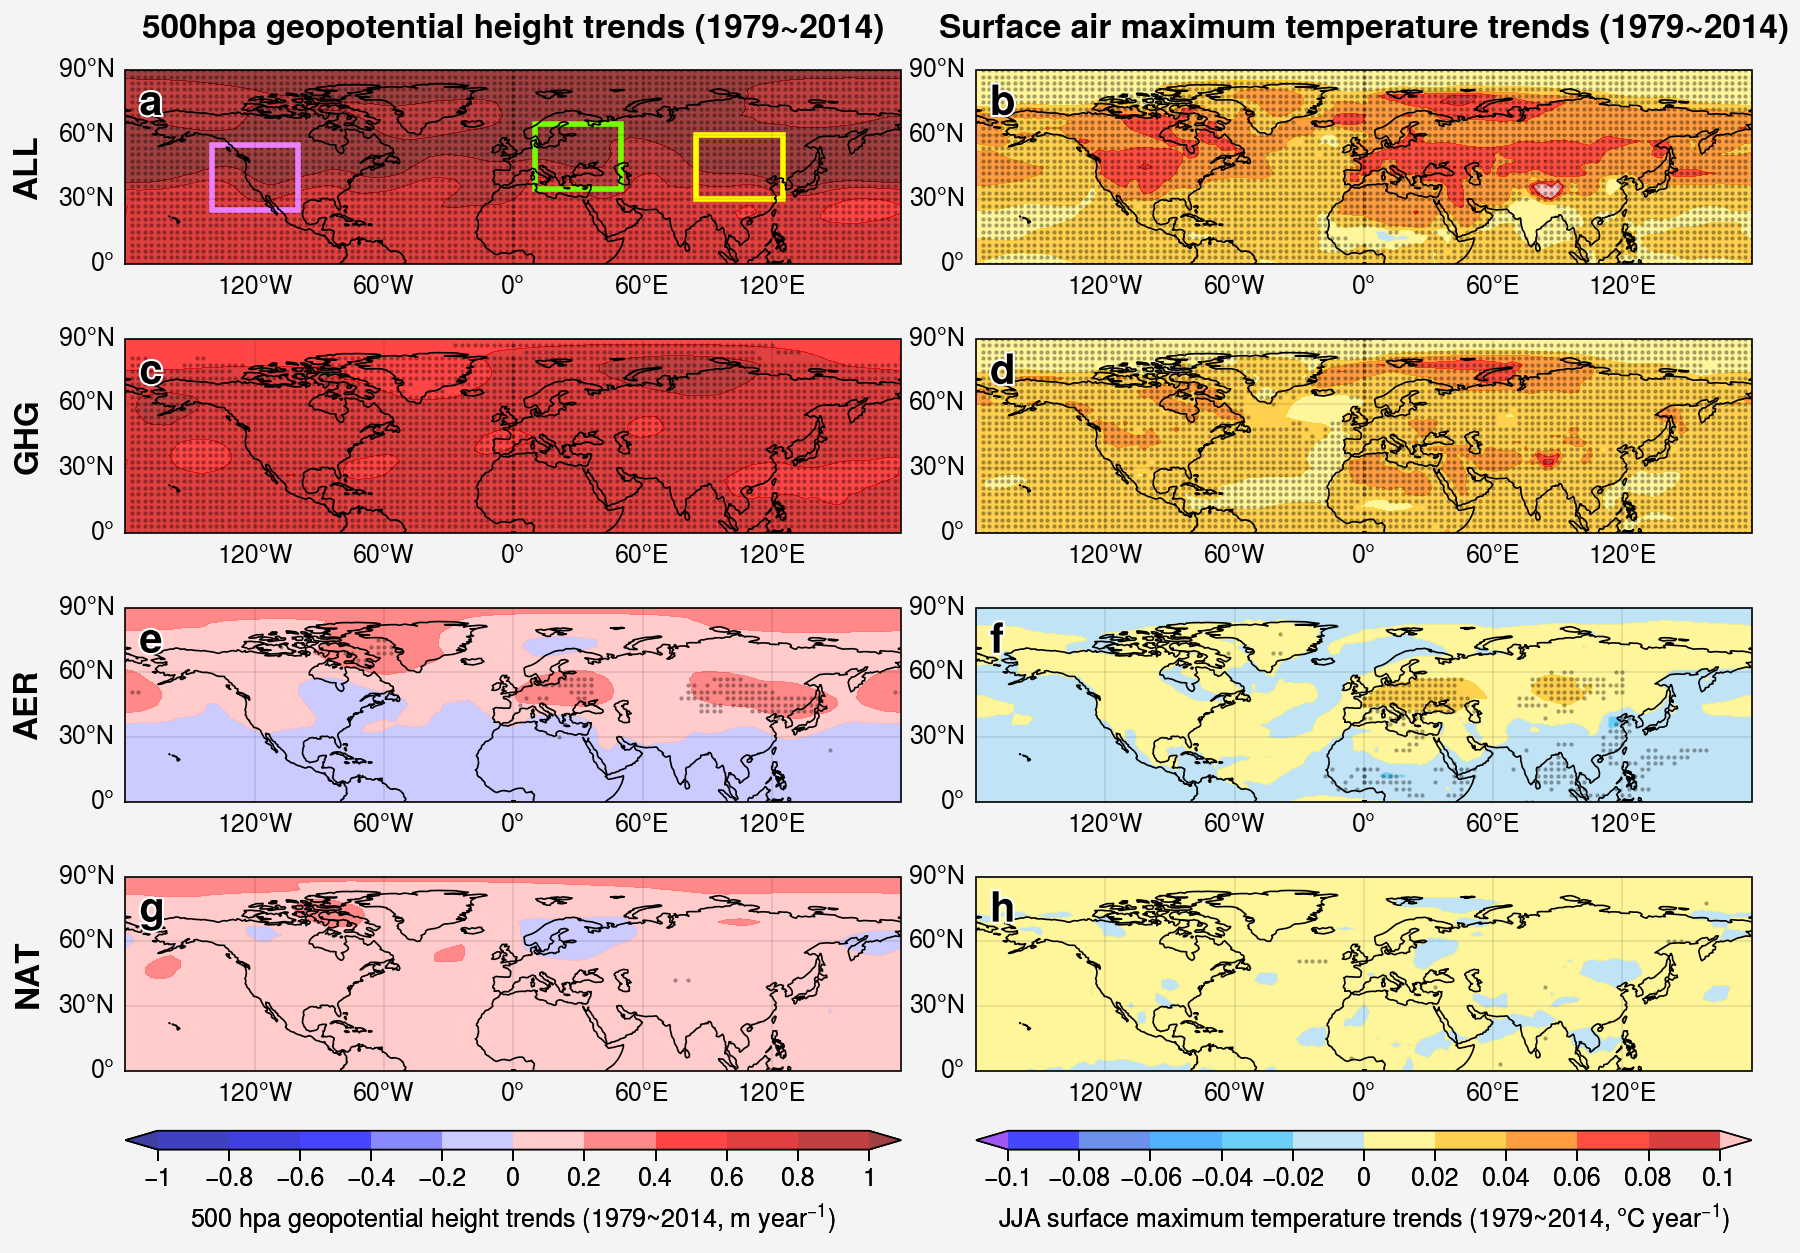

In [ ]:
pplot.rc['leftlabel.size'] = 12
pplot.rc['toplabel.size'] = 12

proj = pplot.Proj('pcarree')
array = [
    [1,2],
    [3,4],
    [5,6],
    [7,8]
]

fig, axs = pplot.subplots(array,wspace=(3),hspace=(3),proj=proj,width = 9,share=False)
levels_hgt = [i for i in np.linspace(-1,1,11)]
levels_tmax = [i for i in np.linspace(-0.1,0.1,11)]
cmap1 = cmaps.BlRe
cmap2=cmaps.ncl_default

for i in range(8):
    if i == 0:
        var_name = 'zg'
        forcing = 'historical'
        trendOrSig = 'trend'
    elif i == 2:
        var_name = 'zg'
        forcing = 'hist-GHG'
        trendOrSig = 'trend'
    elif i == 4:
        var_name = 'zg'
        forcing = 'hist-aer'
        trendOrSig = 'trend'
    elif i == 6:
        var_name = 'zg'
        forcing = 'hist-nat'
        trendOrSig = 'trend'
    elif i == 1:
        var_name = 'tasmax'
        forcing = 'historical'
        trendOrSig = 'seasonmean_trend'
    elif i == 3:
        var_name = 'tasmax'
        forcing = 'hist-GHG'
        trendOrSig = 'seasonmean_trend'
    elif i == 5:
        var_name = 'tasmax'
        forcing = 'hist-aer'
        trendOrSig = 'seasonmean_trend'
    elif i == 7:
        var_name = 'tasmax'
        forcing = 'hist-nat'
        trendOrSig = 'seasonmean_trend'

    cmip_avg = get_cmip_avg(var_name=var_name,forcing =forcing,trendOrSig=trendOrSig)
    lon = cmip_avg.coords['lon']
    lats1d = cmip_avg.coords['lat']
    lon_idx = cmip_avg.dims.index('lon')
    cmip_avg, lons1d = add_cyclic_point(cmip_avg, coord=lon,axis=lon_idx)
    cmip_sig = get_cmip_sig(var_name=var_name,forcing =forcing,trendOrSig=trendOrSig)
    lon = cmip_sig.coords['lon']
    lon_idx = cmip_sig.dims.index('lon')
    cmip_sig, lons1d = add_cyclic_point(cmip_sig, coord=lon,axis=lon_idx)

    X2,Y2 = np.meshgrid(lons1d,lats1d)
    X2 = X2 * cmip_sig
    Y2 = Y2 * cmip_sig
    
    if i == 0 or i == 2 or i == 4 or i == 6:
        level = levels_hgt
    else:
        level = levels_tmax
    if i == 0 or i == 2 or i == 4 or i == 6:
        p1 = axs[i].contourf(lons1d,lats1d,cmip_avg,levels = level, alpha=0.75,extend = 'both',cmap=cmap1)
    else:
        p2 = axs[i].contourf(lons1d,lats1d,cmip_avg,levels = level, alpha=0.75,extend = 'both',cmap=cmap2)
    axs[i].format(coast=True, lonlim=(-180,180), latlim=(0,90),labels=True, lonlines=60, latlines=30)
    axs[i].scatter(X2,Y2,s=1,c='black',alpha=0.25)
    if i == 0:
        axs[i].add_patch(Rectangle((85,30),width=40,height=30,fc='none',color='#FFFF00',linewidth=2))
        axs[i].add_patch(Rectangle((10,35),width=40,height=30,fc='none',color='#76FF03',linewidth=2))
        axs[i].add_patch(Rectangle((-140,25),width=40,height=30,fc='none',color='#EA80FC',linewidth=2))

axs.format(
    abc = 'a', abcloc='ul', abcsize=15, 
    toplabels = ('500hpa geopotential height trends (1979~2014)','Surface air maximum temperature trends (1979~2014)'),
    leftlabels = ('ALL','GHG','AER','NAT'))

fig.colorbar(p1,loc='b',width='0.75em',col=(1),length=1,label='500 hpa geopotential height trends (1979~2014, m $year^{-1}$)')
fig.colorbar(p2,loc='b',width='0.75em',col=(2),length=1,label='JJA surface maximum temperature trends (1979~2014, °C $year^{-1}$)') 

fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/figure_res/'
fig.save(fig_dir + 'FigS2_trends_in_circulation_patterns_and_hot_extreme_under_all_forcings.pdf')